In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
# valores de tempo de execucao da rede
from time import time 
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.ToTensor() #definindo a conversao de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #carrega a parte de treino do datasets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #carrega um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #carrega a parte de validacao do dataset
valloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #cria buffer para pegar os dados por partes


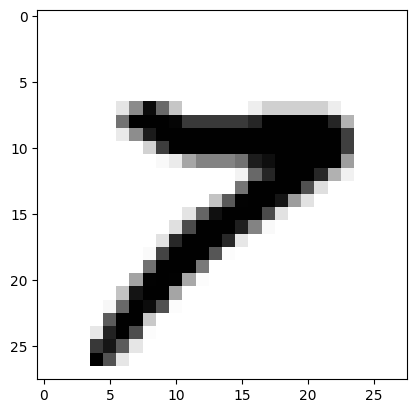

In [3]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')

In [4]:
print(imagens[0].shape) #para verificar as dimensoes do tensor de cada imagem
print(etiquetas[0].shape) #para verificar as dimensoes do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
class MOdelo(nn.Module):
    def __init__(self) -> None:
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128) #camada de entrada, 784 neuronios que se ligam a 128
        self.linear2 = nn.Linear(28*28, 128) #camada interna 1, 128 neuronios que se ligam a 63
        self.linear3 = nn.Linear(28*28, 128) #camada interna 2, 64 neuronios que se ligam a 10
        #para a camada de saida nao e necessario definir nada pois so precisam pegar o output da camada interna 2

    def foward(self, X):
        X = F.relu(self.linear1(X)) #funcao de ativacao da camada de entrada para a camada interna 1
        X = F.relu(self.linear2(X)) #funcao de ativacao da camada interna 1 para a camada interna 2
        X = self.linear3(X) #funcao de ativacao da camada interna 2 para a camada de saida, nesse caso f(x) = x
        return F.log_softmax(X, dim=1) #dados utilizado para calcular a perda